
<span style="color:cyan; font-size:3em; font-family:Papyrus"> 
<div align="center"><b>Pregunta 1</b></div>
</span> 

In [24]:
## Cargando los datos

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import feather

In [26]:
df = pd.read_feather('./data/peruvian_enterprise_list.feather')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501301 entries, 0 to 501300
Data columns (total 9 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Unnamed: 0                                     501298 non-null  float64
 1   RAZÓN SOCIAL                                   501301 non-null  object 
 2   RUC/DNI                                        501301 non-null  object 
 3   SECTOR ECONÓMICO                               501301 non-null  object 
 4   NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO        501301 non-null  object 
 5   NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*  501301 non-null  object 
 6   MONTO PRÉSTAMO (S/)                            501301 non-null  object 
 7   MONTO COBERTURADO (S/)                         501301 non-null  object 
 8   DEPARTAMENTO                                   501301 non-null  object 
dtypes: float64(1), object(8)
memory usage:

## Sobre la Data:
* RAZÓN SOCIAL: Nombre con que una entidad o sociedad mercantil está registrada legalmente.
* RUC: El Registro Único de Contribuyentes, es un registro que identifica a las empresas dentro de algún país.
* SECTOR ECONÓMICO: actividad económica de un Estado o territorio en los sectores primario, secundario, terciario , cuaternarios.
* ENTIDAD OTORGANTE DEL CRÉDITO: Son empresas que han accedido a créditos destinados a financiar actividades de producción, comercialización o prestación de servicios.
* MONTO PRÉSTAMO: Crédito otorgado a la entidad solicitante del prestamo.
* MONTO COBERTURADO: equivalente a 1 mes de ventas promedio mensual del año 2019, o 3 veces la aportación a EsSalud declarada por la empresa en el año 2019.

## Aplicando ETL en la base de datos

In [27]:
df.isna().sum()

Unnamed: 0                                       3
RAZÓN SOCIAL                                     0
RUC/DNI                                          0
SECTOR ECONÓMICO                                 0
NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO          0
NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*    0
MONTO PRÉSTAMO (S/)                              0
MONTO COBERTURADO (S/)                           0
DEPARTAMENTO                                     0
dtype: int64

In [28]:
def apply_etl_to_dataframe(df) -> pd.DataFrame:
    df_aux = df.copy()
    df_aux = df_aux.astype(str)
    df_aux.rename(columns={'Unnamed: 0':'index'}, inplace=True)
    df_aux.dropna(axis=0,inplace=True)
    df_aux = df_aux[:-3]
    df_aux['MONTO PRÉSTAMO (S/)'] = df_aux['MONTO PRÉSTAMO (S/)'].astype(float)
    df_aux['MONTO COBERTURADO (S/)'] = df_aux['MONTO COBERTURADO (S/)'].astype(float)
    df_aux['index'] = df_aux['index'].astype(float).astype(int)
    df_aux.set_index('index', inplace=True)
    return df_aux

df = apply_etl_to_dataframe(df)

In [29]:
df.isna().sum()

RAZÓN SOCIAL                                     0
RUC/DNI                                          0
SECTOR ECONÓMICO                                 0
NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO          0
NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*    0
MONTO PRÉSTAMO (S/)                              0
MONTO COBERTURADO (S/)                           0
DEPARTAMENTO                                     0
dtype: int64

In [30]:
df.sample(3)

,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
index,,,,,,,,
342375,PARI SANCHEZ EDWARD,43832754.0,"TRANSPORTE, ALMACENAMIENTO Y COMUNIC.",0049 - MIBANCO,nan,8752.0,8576.96,PUNO
412814,SALCEDO ANGELES DE ACHUY NELLY AMERICA,7166561.0,COMERCIO,0836 - CRAC RAIZ,nan,34717.0,34022.66,LIMA
147201,DUO ARQUITECTOS ASOCIADOS SAC,20601633192.0,CONSTRUCCION,0011 - BANCO BBVA PERU,nan,267369.0,254000.55,LIMA


## Preguntas

<span style="color:cyan; font-size:1.5em; font-family:Papyrus"> 
<div><b>* Realice un diagrama de barras para observar como se distribuyo el fondo del proyecto en los diferentes rubros
del mercado (columna : SECTOR ECONÓMICO).</b></div>
</span> 




In [31]:
print("""
Distribucion de numero de prestamos por Sector Economico""")
df['SECTOR ECONÓMICO'].value_counts().to_frame()


Distribucion de numero de prestamos por Sector Economico


,SECTOR ECONÓMICO
COMERCIO,237995
"TRANSPORTE, ALMACENAMIENTO Y COMUNIC.",59661
INDUSTRIA MANUFACTURERA,48576
"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",40003
OTROS SERVICIOS,27441
CONSTRUCCION,27117
HOTELES Y RESTAURANTES,24567
"AGRICULTUR, GANADERIA, CAZA Y SILVICULT",21797
SERVICIOS SOCIALES Y DE SALUD,5342
ENSEÑANZA,3094


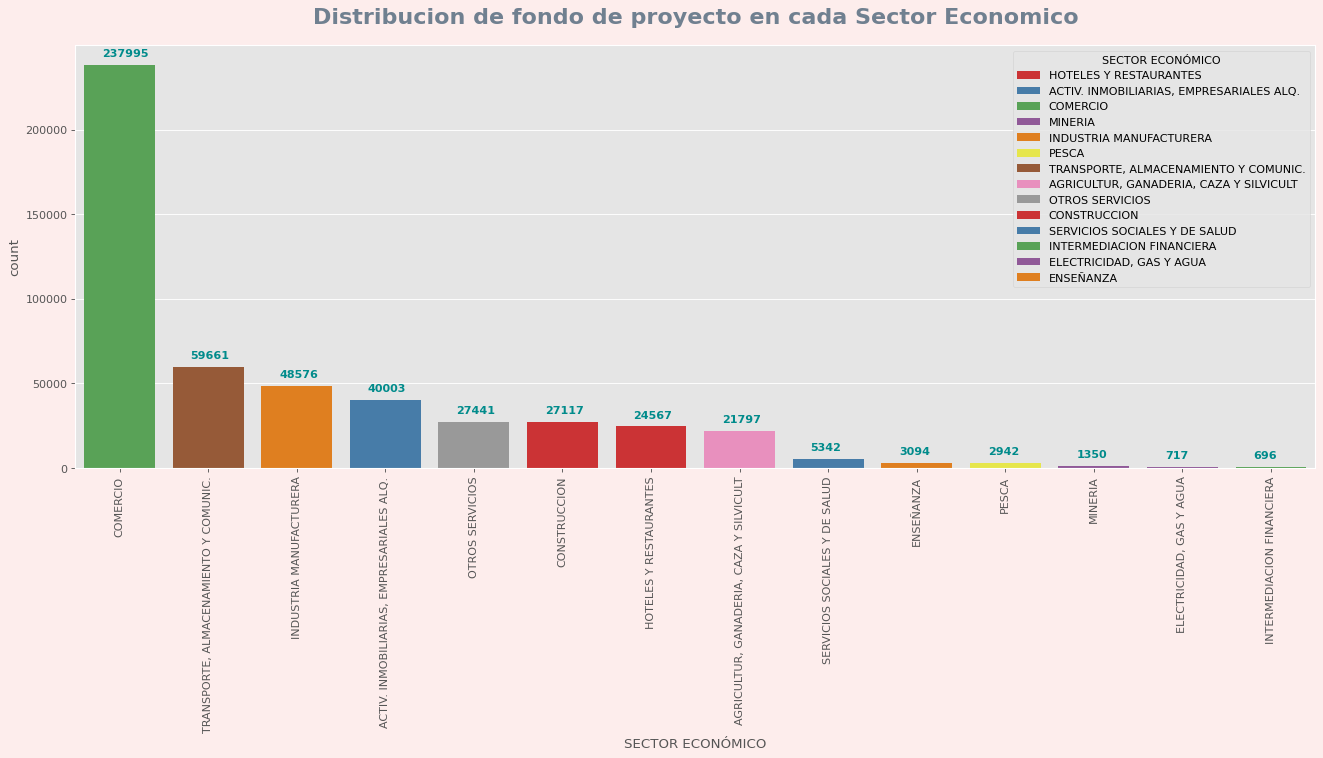

In [32]:
economic_sector = ['COMERCIO',
 'TRANSPORTE, ALMACENAMIENTO Y COMUNIC.',
 'INDUSTRIA MANUFACTURERA',
 'ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.',
 'OTROS SERVICIOS',
 'CONSTRUCCION',
 'HOTELES Y RESTAURANTES',
 'AGRICULTUR, GANADERIA, CAZA Y SILVICULT',
 'SERVICIOS SOCIALES Y DE SALUD',
 'ENSEÑANZA',
 'PESCA',
 'MINERIA',
 'ELECTRICIDAD, GAS Y AGUA',
 'INTERMEDIACION FINANCIERA']

fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
# bar graph with matplotlib 
sns.countplot(x='SECTOR ECONÓMICO', data=df, hue='SECTOR ECONÓMICO',palette='Set1', capsize=.2, dodge=False, order=economic_sector)
plt.title('Distribucion de fondo de proyecto en cada Sector Economico', fontsize=20, color="slategrey", 
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center") 
plt.xticks(rotation=90)
plt.MaxNLocator(nbins=14, prune='lower', min_n_ticks=2, integer=True)
xlocs, xlabs = plt.xticks()
y = [237995,59661,48576,40003,27441,27117,24567,21797,5342,3094,2942,1350,717,696]
xlocs=[i for i in range(14)]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 5000, str(v), color='darkcyan', fontweight='bold')
plt.show()

In [33]:
print("""
Total del monto de Prestamos por Sector Economico:""")
loan_amount = df.groupby('SECTOR ECONÓMICO')['MONTO PRÉSTAMO (S/)'].sum().sort_values(ascending=False).to_frame()
loan_amount.reset_index(inplace=True)
loan_amount


Total del monto de Prestamos por Sector Economico:


,SECTOR ECONÓMICO,MONTO PRÉSTAMO (S/)
0,COMERCIO,2.276485e+10
1,INDUSTRIA MANUFACTURERA,8.499674e+09
2,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",6.996487e+09
3,"TRANSPORTE, ALMACENAMIENTO Y COMUNIC.",6.061192e+09
4,CONSTRUCCION,2.766270e+09
5,OTROS SERVICIOS,2.732737e+09
6,"AGRICULTUR, GANADERIA, CAZA Y SILVICULT",2.625267e+09
7,HOTELES Y RESTAURANTES,1.734407e+09
8,SERVICIOS SOCIALES Y DE SALUD,9.225031e+08
9,ENSEÑANZA,9.109740e+08


In [34]:
df.sort_values(by='MONTO PRÉSTAMO (S/)', ascending=False).head(5) 

,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
index,,,,,,,,
229899,INTCOMEX PERU SAC,20254507874.0,COMERCIO,0009 - SCOTIABANK,nan,10000000.0,8000000.0,LIMA
226121,INDUSTRIA GRAFICA CIMAGRAF SAC,20136492277.0,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,nan,10000000.0,8000000.0,LIMA
360774,PROSEGURIDAD S.A.,20101155588.0,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0002 - CRÉDITO,nan,10000000.0,8000000.0,LIMA
225601,INCA RAIL S.A.,20515164945.0,"TRANSPORTE, ALMACENAMIENTO Y COMUNIC.",0002 - CRÉDITO,nan,10000000.0,8000000.0,LIMA
225615,INCA TOPS SA,20100199743.0,INDUSTRIA MANUFACTURERA,0002 - CRÉDITO,nan,10000000.0,8000000.0,AREQUIPA


In [35]:
df.sort_values(by='MONTO PRÉSTAMO (S/)', ascending=False).tail(5) 

,RAZÓN SOCIAL,RUC/DNI,SECTOR ECONÓMICO,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,NOMBRE DE 2DA. ENTIDAD OTORGANTE DEL CRÉDITO*,MONTO PRÉSTAMO (S/),MONTO COBERTURADO (S/),DEPARTAMENTO
index,,,,,,,,
397018,RODRIGUEZ PARI BILY,46059341.0,COMERCIO,0049 - MIBANCO,nan,301.0,294.98,PUNO
468846,VALERO ALI MARINO JORGE,29398998.0,"ACTIV. INMOBILIARIAS, EMPRESARIALES ALQ.",0049 - MIBANCO,nan,301.0,294.98,AREQUIPA
200367,GUTIERREZ PALACO DEKER ROY,45626868.0,SERVICIOS SOCIALES Y DE SALUD,0049 - MIBANCO,nan,300.0,294.00,PUNO
30448,ARIMUYA MORI ARNOLD SACS,71421110.0,OTROS SERVICIOS,0811 - CMAC MAYNAS,nan,300.0,294.00,AYACUCHO
52911,BRAVO BANCES JHON ALEJANDRO,10450253010.0,COMERCIO,0002 - CRÉDITO,nan,234.0,229.32,LIMA


**Resultados:**
* El sector **Comercio** recibio **237995** prestamos.
* El Sector **Comercio** es el Sector Economico que mas prestamos minimos ha entregado, siendo el minimo $234.0 (S/)$.
* El Sector **Comercio** ha entregado el mayor pretamos a una empresa, siendo $10000000.0 (S/)$
* el Sector **Comercio** tiene el monto de $276485.0 x 10^{10} (S/)$, conviertiendolo en el sector con mayor monto total en todo el proyecto.
* el sector **INTERMEDIACION FINANCIERA** tiene la menor cantidad de monto total siendo  $1.828335 x 10^{08} (S/)$ y ademas, solo ha entregado 696 prestamos


**Conclusiones:**
* Segun los datos analizados, el sector que predomina y ha recibido mas prestamos de reactiva peru en el 2020 es el Sector **Comercio** dando a entender que en el pais Perú predomina el Sector terciario.
* Ademas, puedo afirmar que el sector **ENSEÑANZA** no es prioridad para mayor cantidad de prestamos

<span style="color:cyan; font-size:1.5em; font-family:Papyrus"> 
<div><b>* Muestre mediante un diagrama de barras el total de monto prestado (columna : MONTO PRÉSTAMO (S/)) 
por cada entidad otorgante (columna : NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO)</b></div>
</span> 




In [36]:
print("""
Distribucion de numero de prestamos por Entidad Financiera""")
df['NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO'].value_counts().to_frame()


Distribucion de numero de prestamos por Entidad Financiera


,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO
0049 - MIBANCO,255671
0002 - CRÉDITO,64832
0011 - BANCO BBVA PERU,25101
0803 - CMAC AREQUIPA,22095
0003 - INTERBANK,19677
0806 - CMAC CUSCO,19331
0808 - CMAC DE HUANCAYO,19101
0836 - CRAC RAIZ,15847
0009 - SCOTIABANK,12296
0098 - FINANCIERA PROEMPRESA S.A.,6849


In [37]:
print("""
Monto total de prestamo por entidad financiera:""")
loan_amount_by_entity = df.groupby('NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO')['MONTO PRÉSTAMO (S/)'].sum().sort_values(ascending=False).to_frame()
loan_amount_by_entity.reset_index(inplace=True)
# change column name
loan_amount_by_entity.rename(columns={'MONTO PRÉSTAMO (S/)':'MONTO TOTAL PRÉSTAMO (S/)'}, inplace=True)
loan_amount_by_entity


Monto total de prestamo por entidad financiera:


,NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO,MONTO TOTAL PRÉSTAMO (S/)
0,0002 - CRÉDITO,2.614493e+10
1,0011 - BANCO BBVA PERU,1.141423e+10
2,0003 - INTERBANK,6.576735e+09
3,0009 - SCOTIABANK,5.195187e+09
4,0049 - MIBANCO,2.697660e+09
5,0035 - BANCO PICHINCHA,1.309061e+09
6,0038 - INTERAMERICANO,1.284487e+09
7,0806 - CMAC CUSCO,7.902425e+08
8,0803 - CMAC AREQUIPA,4.429210e+08
9,0808 - CMAC DE HUANCAYO,4.363242e+08


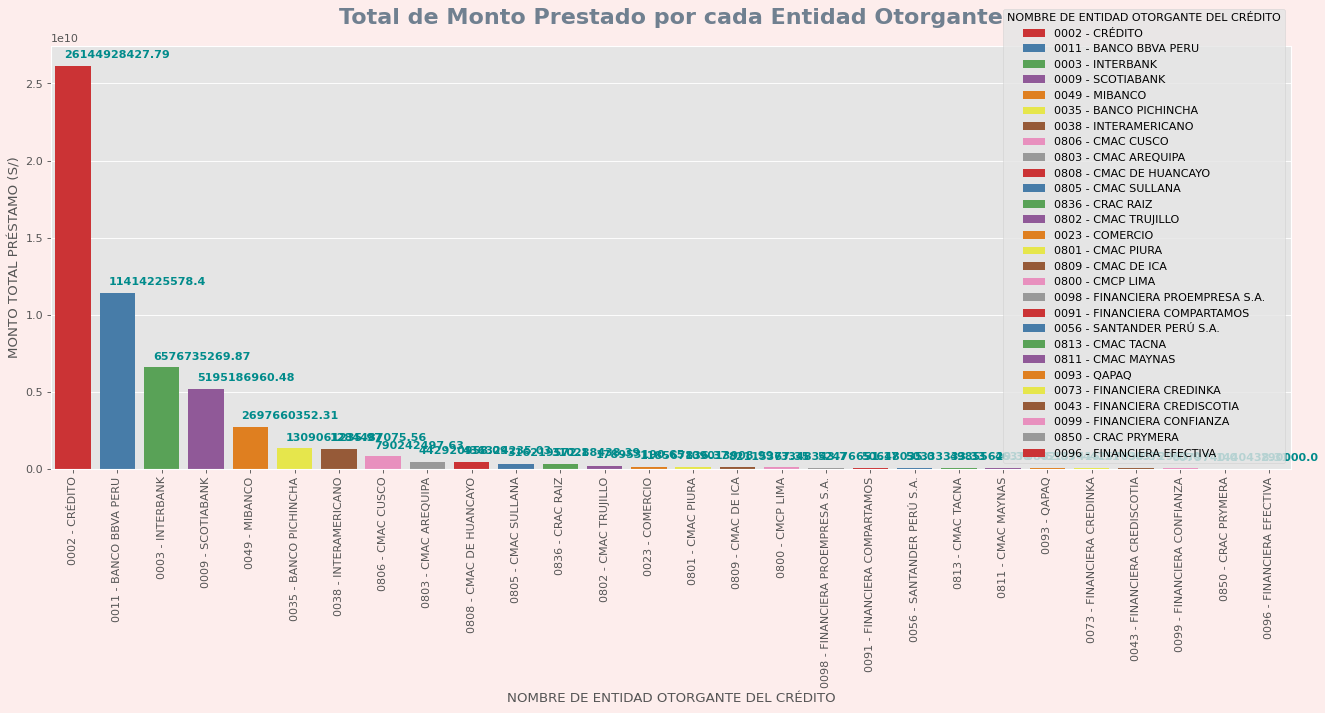

In [38]:
fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.barplot(
    x='NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO', 
    y='MONTO TOTAL PRÉSTAMO (S/)', 
    hue='NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO',
    data=loan_amount_by_entity, 
    palette='Set1', capsize=.2, 
    dodge=False, order=loan_amount_by_entity['NOMBRE DE ENTIDAD OTORGANTE DEL CRÉDITO'])
plt.title('Total de Monto Prestado por cada Entidad Otorgante', fontsize=20, color="slategrey",
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xticks(rotation=90)
plt.MaxNLocator(nbins=14, prune='lower', min_n_ticks=2, integer=True)
xlocs, xlabs = plt.xticks()
y = round(loan_amount_by_entity['MONTO TOTAL PRÉSTAMO (S/)'],2).to_list()
xlocs=[i for i in range(len(loan_amount_by_entity))]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 500000000, str(v), color='darkcyan', fontweight='bold')
plt.show()


**Resultados:**
* El sector **Comercio** recibio **237995** prestamos.
* El Sector **Comercio** es el Sector Economico que mas prestamos minimos ha entregado, siendo el minimo $234.0 (S/)$.
* El Sector **Comercio** ha entregado el mayor pretamos a una empresa, siendo $10000000.0 (S/)$
* el Sector **Comercio** tiene el monto de $276485.0 x 10^{10} (S/)$, conviertiendolo en el sector con mayor monto total en todo el proyecto.
* el sector **INTERMEDIACION FINANCIERA** tiene la menor cantidad de monto total siendo  $1.828335 x 10^{08} (S/)$ y ademas, solo ha entregado 696 prestamos


**Conclusiones:**
* Segun los datos analizados, el sector que predomina y ha recibido mas prestamos de reactiva peru en el 2020 es el Sector **Comercio** dando a entender que en el pais Perú predomina el Sector terciario.
* Ademas, puedo afirmar que el sector **ENSEÑANZA** no es prioridad para mayor cantidad de prestamos

<span style="color:cyan; font-size:1.5em; font-family:Papyrus"> 
<div><b>* Muestre mediante un diagrama de barras el total de monto prestado (columna : MONTO PRÉSTAMO (S/)) 
para cada departamento (columna : DEPARTAMENTO)</b></div>
</span> 

In [39]:
print("""
Distribucion de numero de prestamos por Departamento""")
df['DEPARTAMENTO'].value_counts().to_frame()


Distribucion de numero de prestamos por Departamento


,DEPARTAMENTO
LIMA,153251
PUNO,37377
PIURA,33406
AREQUIPA,31450
CUSCO,29427
CAJAMARCA,27663
LA LIBERTAD,25833
LAMBAYEQUE,24117
JUNIN,23252
ANCASH,22045


In [40]:
print("""
Monto total de prestamo por cada Departamento:""")
loan_amount_by_city = df.groupby('DEPARTAMENTO')['MONTO PRÉSTAMO (S/)'].sum().sort_values(ascending=False).to_frame()
loan_amount_by_city.reset_index(inplace=True)
# change column name
loan_amount_by_city.rename(columns={'MONTO PRÉSTAMO (S/)':'MONTO TOTAL PRÉSTAMO (S/)'}, inplace=True)
loan_amount_by_city


Monto total de prestamo por cada Departamento:


,DEPARTAMENTO,MONTO TOTAL PRÉSTAMO (S/)
0,LIMA,3.629611e+10
1,AREQUIPA,2.720092e+09
2,LA LIBERTAD,2.528819e+09
3,CALLAO,1.830696e+09
4,PIURA,1.684091e+09
5,CUSCO,1.396189e+09
6,LAMBAYEQUE,1.352464e+09
7,JUNIN,1.185970e+09
8,PUNO,1.065405e+09
9,CAJAMARCA,1.030486e+09


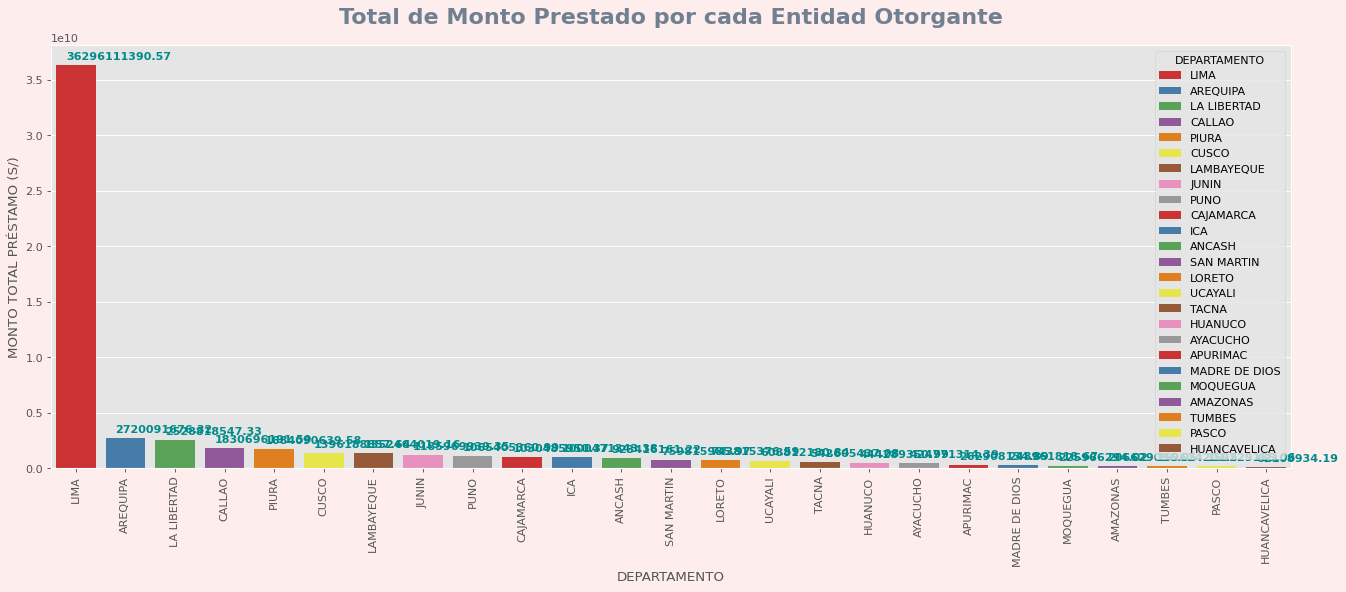

In [41]:
fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
plt.style.use('ggplot')
sns.barplot(
    x='DEPARTAMENTO', 
    y='MONTO TOTAL PRÉSTAMO (S/)',
    hue='DEPARTAMENTO',
    data=loan_amount_by_city, 
    palette='Set1', capsize=.2, 
    dodge=False, order=loan_amount_by_city['DEPARTAMENTO'])
plt.title('Total de Monto Prestado por cada Entidad Otorgante', fontsize=20, color="slategrey",
fontweight="bold", y=1.05, x=0.5, horizontalalignment="center", verticalalignment="center")
plt.xticks(rotation=90)
plt.MaxNLocator(nbins=14, prune='lower', min_n_ticks=2, integer=True)
xlocs, xlabs = plt.xticks()
y = round(loan_amount_by_city['MONTO TOTAL PRÉSTAMO (S/)'],2).to_list()
xlocs=[i for i in range(len(loan_amount_by_city))]
for i, v in enumerate(y):
    plt.text(xlocs[i] - 0.2, v + 500000000, str(v), color='darkcyan', fontweight='bold')
plt.show()

**Resultados:**
* El sector **Comercio** recibio **237995** prestamos.
* El Sector **Comercio** es el Sector Economico que mas prestamos minimos ha entregado, siendo el minimo $234.0 (S/)$.
* El Sector **Comercio** ha entregado el mayor pretamos a una empresa, siendo $10000000.0 (S/)$
* el Sector **Comercio** tiene el monto de $276485.0 x 10^{10} (S/)$, conviertiendolo en el sector con mayor monto total en todo el proyecto.
* el sector **INTERMEDIACION FINANCIERA** tiene la menor cantidad de monto total siendo  $1.828335 x 10^{08} (S/)$ y ademas, solo ha entregado 696 prestamos


**Conclusiones:**
* Segun los datos analizados, el sector que predomina y ha recibido mas prestamos de reactiva peru en el 2020 es el Sector **Comercio** dando a entender que en el pais Perú predomina el Sector terciario.
* Ademas, puedo afirmar que el sector **ENSEÑANZA** no es prioridad para mayor cantidad de prestamos

<span style="color:cyan; font-size:1.5em; font-family:Papyrus"> 
<div><b>* Realice un histograma para la columna MONTO COBERTURADO (S/) para cada uno de los departamentos</b></div>
</span> 



In [42]:
df['DEPARTAMENTO'].value_counts().to_frame()

,DEPARTAMENTO
LIMA,153251
PUNO,37377
PIURA,33406
AREQUIPA,31450
CUSCO,29427
CAJAMARCA,27663
LA LIBERTAD,25833
LAMBAYEQUE,24117
JUNIN,23252
ANCASH,22045


In [43]:
print("""
Monto total de prestamo por cada Departamento:""")
cover_loan_amount_by_city = df.groupby('DEPARTAMENTO')['MONTO COBERTURADO (S/)'].sum().sort_values(ascending=False).to_frame()
cover_loan_amount_by_city.reset_index(inplace=True)
# change column name
cover_loan_amount_by_city.rename(columns={'MONTO COBERTURADO (S/)':'MONTO TOTAL COBERTURADO (S/)'}, inplace=True)
cover_loan_amount_by_city


Monto total de prestamo por cada Departamento:


,DEPARTAMENTO,MONTO TOTAL COBERTURADO (S/)
0,LIMA,3.234284e+10
1,AREQUIPA,2.487568e+09
2,LA LIBERTAD,2.298342e+09
3,CALLAO,1.620270e+09
4,PIURA,1.533655e+09
5,CUSCO,1.306898e+09
6,LAMBAYEQUE,1.234185e+09
7,JUNIN,1.107198e+09
8,PUNO,1.006756e+09
9,CAJAMARCA,9.561978e+08


In [44]:
df[df['DEPARTAMENTO']=='APURIMAC']['MONTO COBERTURADO (S/)'].sort_values(ascending=False).to_frame()

,MONTO COBERTURADO (S/)
index,
231840,8000000.00
143496,6746130.90
150270,6570000.00
119629,3496111.20
186838,3365754.30
...,...
368665,528.22
221607,461.58
297099,447.86


In [45]:

# fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
# plt.style.use('ggplot')
# a,b,c =  plt.hist(df[df['DEPARTAMENTO']=='APURIMAC']['MONTO COBERTURADO (S/)'], bins=20)
# plt.show()

<AxesSubplot:xlabel='MONTO COBERTURADO (S/)', ylabel='Count'>

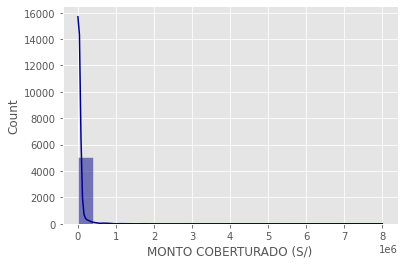

In [46]:
sns.histplot(
                data=df[df['DEPARTAMENTO']=='APURIMAC'], 
                x='MONTO COBERTURADO (S/)', kde=True, color="darkblue", bins=20, multiple="stack")

In [47]:
# cities = df['DEPARTAMENTO'].unique()
# for city in cities:
#     fig = plt.figure(figsize=(20,7), facecolor = '#FDEDEC', edgecolor = '#FDEDEC', dpi=80)
#     plt.style.use('ggplot')
#     plt.hist(df[df['DEPARTAMENTO']==city]['MONTO COBERTURADO (S/)'], bins=20, label=city)
#     plt.show()



c:\Users\joel_\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


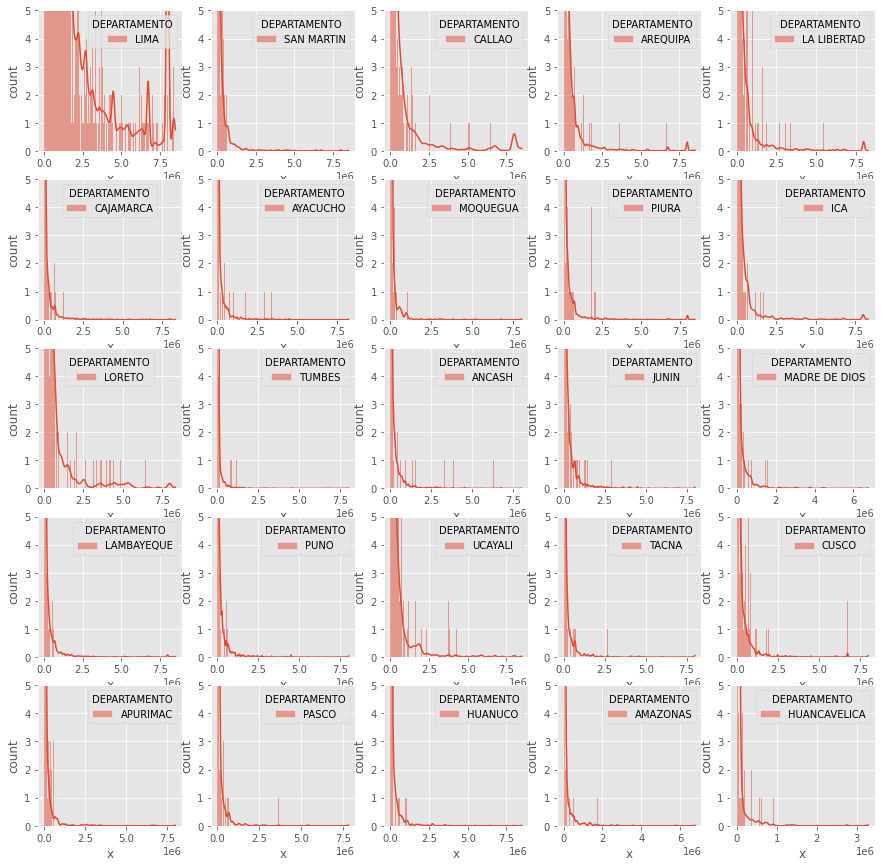

In [49]:
ncols = 5
nrows = 5
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))

cities = df['DEPARTAMENTO'].unique()
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if counter < len(cities):
            sns.histplot(
                data=df[df['DEPARTAMENTO']==cities[counter]], 
                x='MONTO COBERTURADO (S/)', hue='DEPARTAMENTO'
                , kde=True, color="darkblue", ax=ax, )
            ax.set_xlabel('x')
            ax.set_ylabel('count')
            ax.set_ylim([0, 5])
            # leg = ax.legend(loc='upper left')
            # leg.draw_frame(False)
        else:
            ax.set_axis_off()
        counter += 1
plt.show()